## the final version##

In [1]:
import numpy as np
from skimage import io
from skimage.color import *
from matplotlib import pyplot as plt



# Euclidien distance
# Norm of two points
def distance(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

# Difference in color of the pixel values
def color_diff(c1,c2):
    return np.abs(c1-c2)

def gaussian(sigma_s, x):
    return ( (np.exp(-(x*x)/(2*(sigma_s**2)))) / (sigma_s * np.sqrt(2*np.pi))  )

def color_distance(sigma_r, x):
    return ( 1 / (1 + (x**2/sigma_r**2)) )


def bilateral_filter(src, filtered_img, diameter, x, y, sigma_s, sigma_r):
    
    hl = int(diameter/2)
    filtered_temp = 0
    w_tot = 0
    for i in range(diameter):
        for j in range(diameter):
            neighbour_x = x - (hl-i)
            neighbour_y = y - (hl-j)
            
            if neighbour_x < 0:
                neighbour_x = 0
            if neighbour_y < 0:
                neighbour_y = 0
            
            if neighbour_x >= len(src):
                neighbour_x -= len(src)
            if neighbour_y >= len(src[0]):
                neighbour_y -= len(src[0])
                
            g_dist = gaussian(sigma_s, distance(x, y, neighbour_x, neighbour_y))
            
            d_col = color_distance( sigma_r, color_diff(src[neighbour_x][neighbour_y] , src[x][y]))
            
            w = g_dist * d_col
            filtered_temp += src[neighbour_x][neighbour_y] * w
            
            w_tot += w
    
    filtered_temp = filtered_temp / w_tot
    
    filtered_img[x][y] = filtered_temp
    return filtered_img
            

def my_filter(src, diameter, sigma_s, sigma_r):
    filtered_img = np.zeros(src.shape)
    
    for i in range(len(src)):
        for j in range(len(src[0])):
            bilateral_filter(src, filtered_img, diameter, i, j, sigma_s, sigma_r)
            
    return filtered_img
    



In [2]:
img = io.imread("./test/aruto.jpg")
filtered_R = my_filter(img[:,:,0],15, 30,15)
filtered_G = my_filter(img[:,:,1],15, 30,15)
filtered_B = my_filter(img[:,:,2],15, 30,15)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app


KeyboardInterrupt: 

In [3]:
bilateral = np.zeros([filtered_R.shape[0],filtered_R.shape[1],3])
bilateral[:,:,0]=filtered_R[:,:]
bilateral[:,:,1]=filtered_G[:,:]
bilateral[:,:,2]=filtered_B[:,:]

In [ ]:
from skimage.restoration import denoise_bilateral as bilateralfilter
bilateral_lib= bilateralfilter(img, win_size=15, sigma_color=15,
                           sigma_spatial=30, bins=1000, multichannel=True)

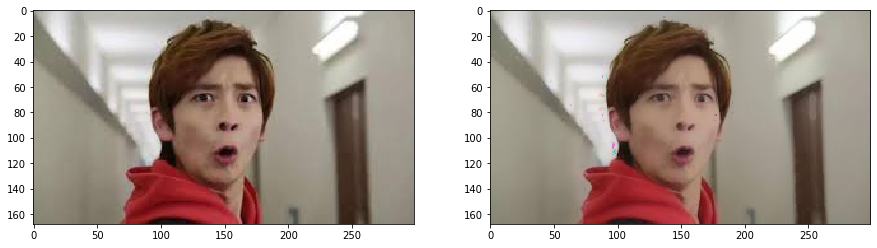

In [5]:
fig, axes = plt.subplots(1, ncols=3, figsize=(15, 10))
ax = axes.ravel()
ax[0].imshow(img)
ax[1].imshow(bilateral/255)
ax[2].imshow(bilateral_lib)
plt.show()


In [35]:
import numpy as np
from skimage import io
from skimage.color import *
from matplotlib import pyplot as plt
img = io.imread("./test/aruto.jpg")
from skimage.restoration import denoise_bilateral as bilateralfilter
b= bilateralfilter(img, win_size=15, sigma_color=20,
                           sigma_spatial=150, bins=1000, multichannel=True)

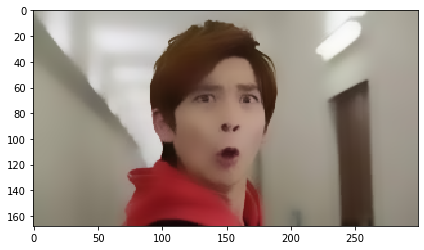

In [36]:
io.imshow(b)